In [1]:
print("🔹 HydroVision: AI-Powered Water Quality Analysis 🔹")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

print("🔹 All libraries are imported 🔹")


🔹 HydroVision: AI-Powered Water Quality Analysis 🔹
🔹 All libraries are imported 🔹



First 5 rows:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           

/tmp/ipython-input-2562728302.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Potability', data=df, palette='Set2')


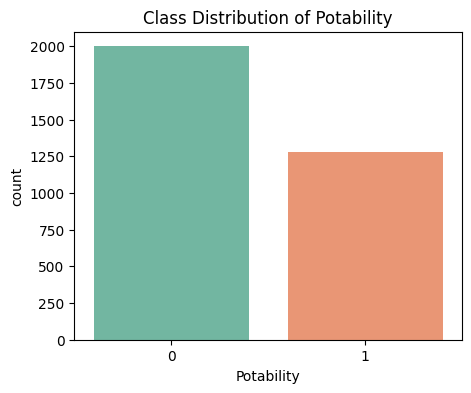

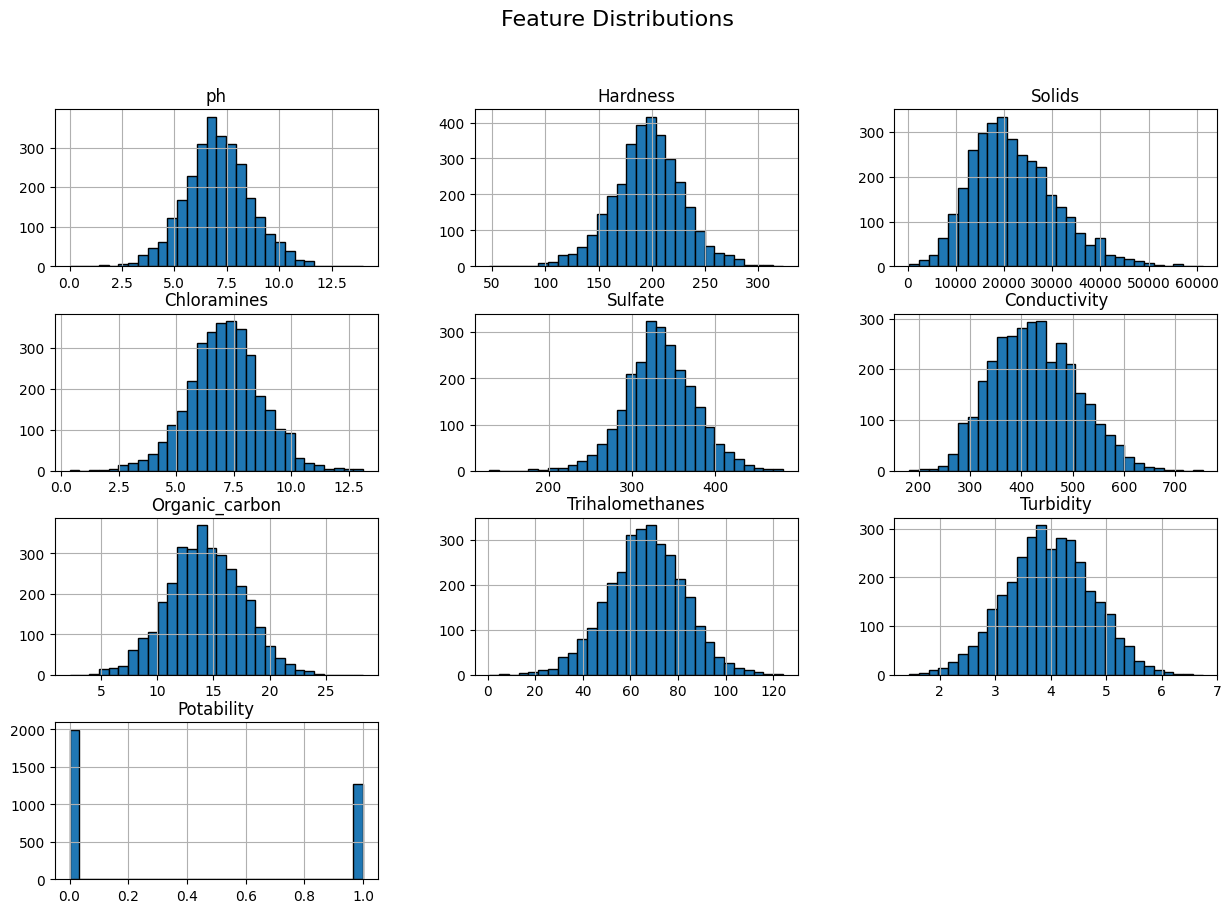

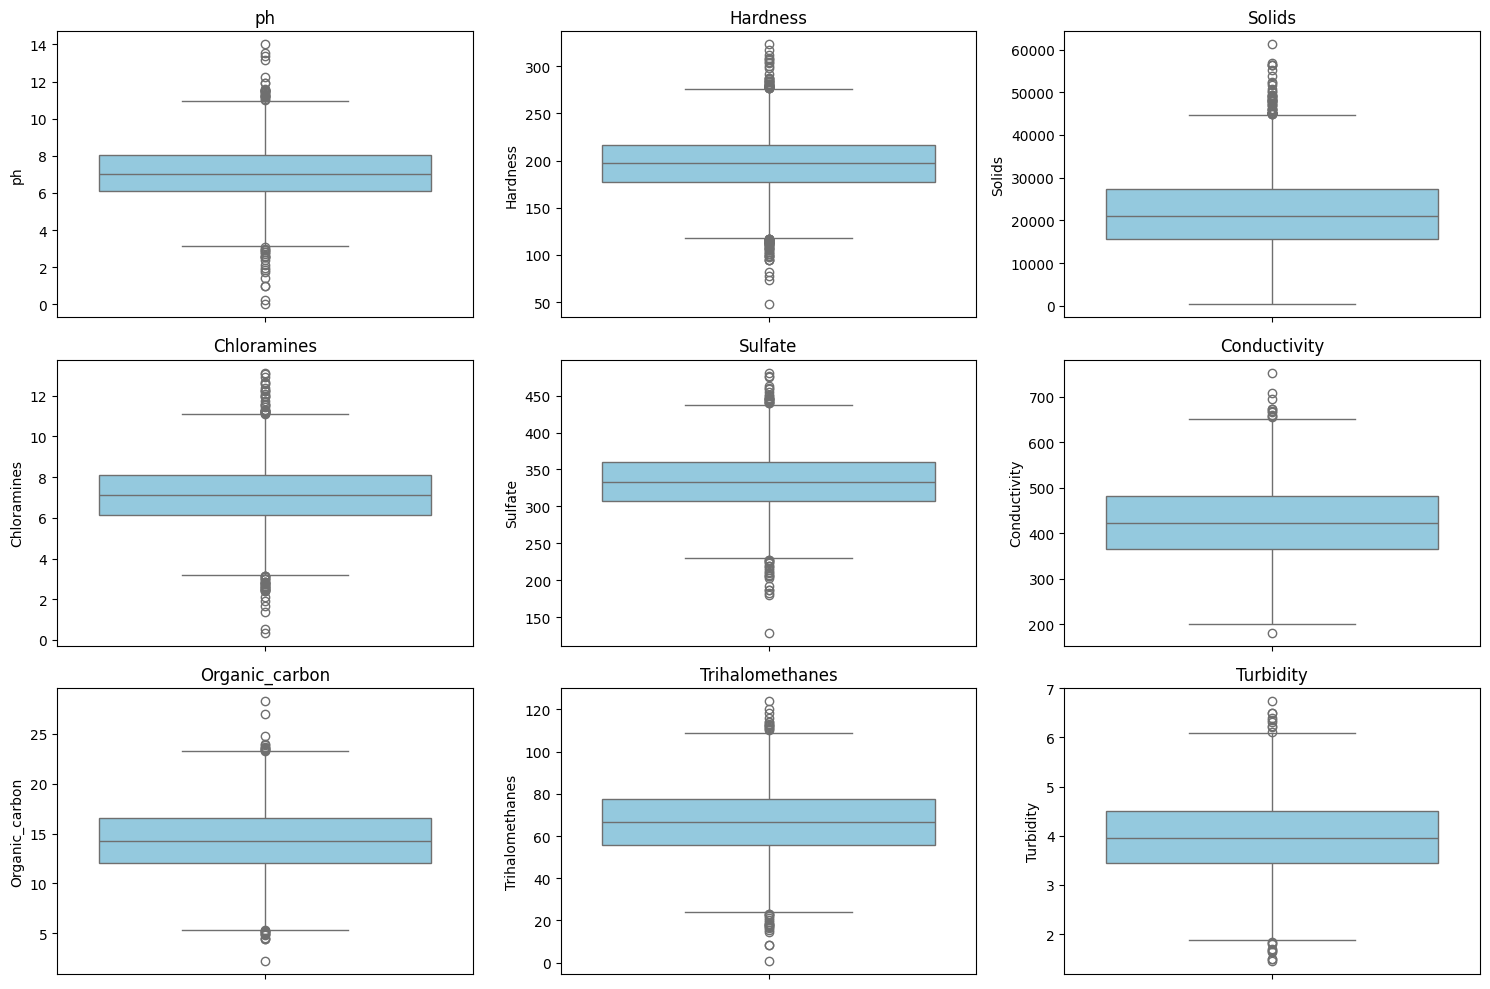

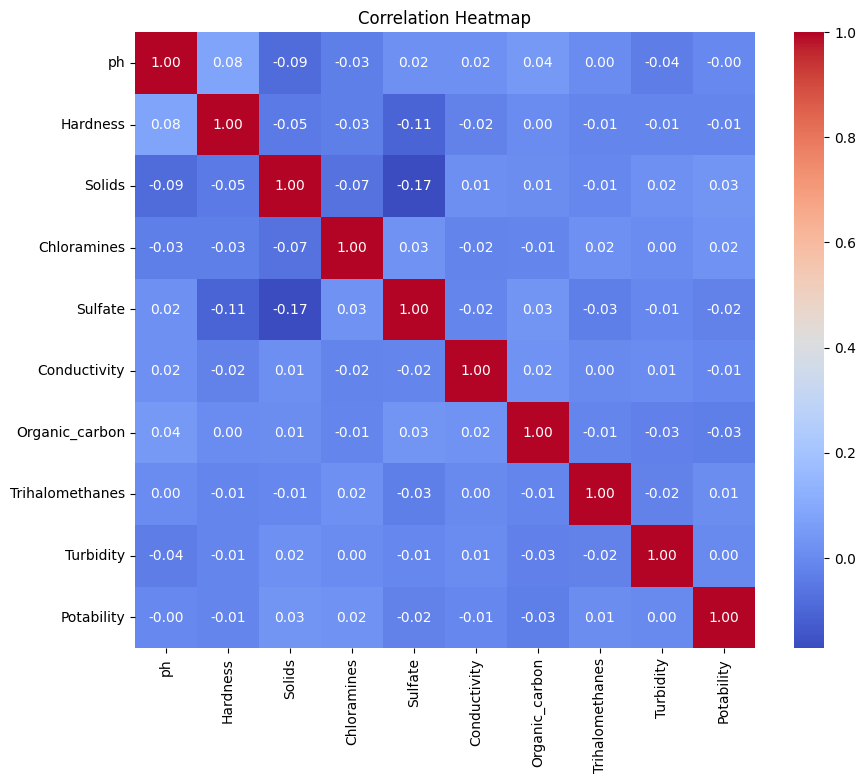


Missing Values After Imputation:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Scaled Feature Sample:
             ph  Hardness    Solids  Chloramines       Sulfate  Conductivity  \
0 -6.043133e-16  0.259195 -0.139471     0.112415  9.613574e-01      1.708954   
1 -2.289339e+00 -2.036414 -0.385987    -0.307694  3.145987e-15      2.062575   
2  6.928678e-01  0.847665 -0.240047     1.360594  3.145987e-15     -0.094032   
3  8.409504e-01  0.547651  0.000493     0.592008  6.395190e-01     -0.778830   
4  1.368569e+00 -0.464429 -0.460249    -0.363698 -6.541765e-01     -0.343939   

   Organic_carbon  Trihalomethanes  Turbidity  
0       -1.180651         1.306149  -1.286298  
1        0.270597        -0.638480   0.684218  
2        0.781117         0.001509  -1.167365  
3        1.255134         2.152874   0.848412 

/tmp/ipython-input-2562728302.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")


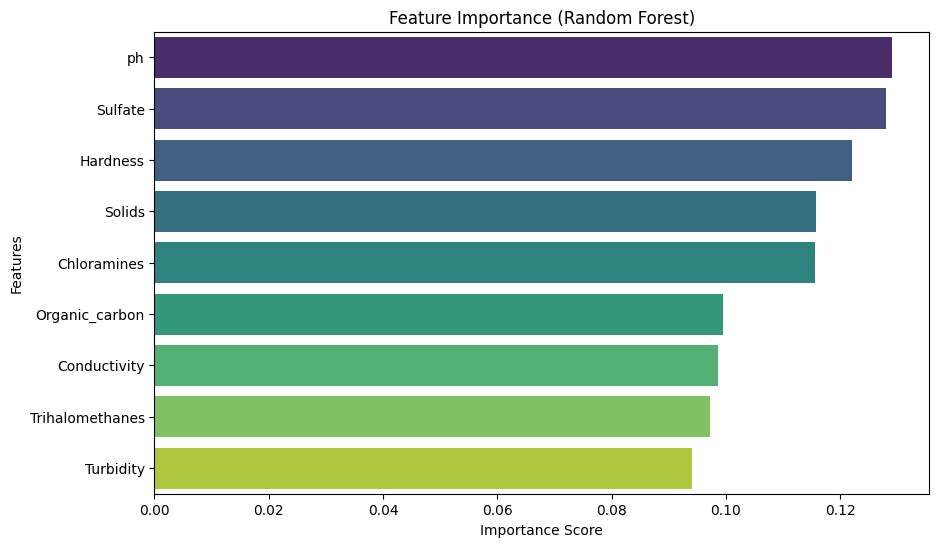


Feature Importance Ranking:
ph                 0.129176
Sulfate            0.128030
Hardness           0.122093
Solids             0.115762
Chloramines        0.115576
Organic_carbon     0.099438
Conductivity       0.098670
Trihalomethanes    0.097173
Turbidity          0.094082
dtype: float64


In [2]:

url = "https://raw.githubusercontent.com/0xkal123/hydrovison/refs/heads/main/water_potability.csv"
df = pd.read_csv(url)


# DATA UNDERSTANDING


print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print(f"\nDataset Shape: {df.shape}")

df.to_csv("water_potability_clean.csv", index=False)
print("\n✅ Dataset saved as water_potability_clean.csv")


#EXPLORATORY DATA ANALYSIS (EDA)


print("\n🔹 Starting Week 2: EDA, Data Transformation & Feature Selection 🔹")

print("\nClass Distribution (Potability: 0=Not Drinkable, 1=Drinkable):")
print(df['Potability'].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x='Potability', data=df, palette='Set2')
plt.title("Class Distribution of Potability")
plt.show()

df.hist(figsize=(15,10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


#  DATA TRANSFORMATION



imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("\nMissing Values After Imputation:")
print(df_imputed.isnull().sum())


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed.drop('Potability', axis=1))
X_scaled = pd.DataFrame(X_scaled, columns=df.columns[:-1])
y = df_imputed['Potability']

print("\nScaled Feature Sample:")
print(X_scaled.head())


# FEATURE SELECTION


model = RandomForestClassifier(random_state=42)
model.fit(X_scaled, y)

importances = pd.Series(model.feature_importances_, index=X_scaled.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

print("\nFeature Importance Ranking:")
print(importances)



